In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.7.0
Keras version: 2.7.0


In [2]:
# GPU Check
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  0


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.8, random_state=42
)

batch_size = 32
num_epochs = 5

In [4]:
# Normalizing
X_train = (X_train - 0) / (255 - 0)
X_test = (X_test - 0) / (255 - 0)
# One-Hot-Encoding
Y_train_en = to_categorical(y_train, 10)
Y_test_en = to_categorical(y_test, 10)

In [5]:
# Model 1 simple MLP

mlp = Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation="sigmoid", input_shape=(32 * 32 * 3,)),
        Dense(512, activation="sigmoid"),
        Dense(10, activation="softmax"),
    ]
)
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
mlp.summary()
history = mlp.fit(
    X_train,
    Y_train_en,
    epochs=num_epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_test, Y_test_en),
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 4s 10ms/step - loss: 2.0731 - accuracy: 0.2368 - val_loss: 1.9085 - val_accuracy: 0.3091
Epoch 2/5
313/313 [=================

In [7]:
# Build a Convolutional neural network with the following architecture:
# • 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
# • 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
# • Flatten layer (to pass to the Fully Connected layers)
# • Fully connected (Dense) layer with 512 units and a sigmoid activation function
# • Fully connected layer with 512 units and a sigmoid activation function
# • Dense layer (output layer) with 10 units and a suitable activation function for the
# classification task

# CNN Model 1
cnn_1 = Sequential(
    [
        Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation="relu"),
        Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation="relu"),
        Flatten(),
        Dense(512, activation="sigmoid"),
        Dense(512, activation="sigmoid"),
        Dense(10, activation="softmax"),
    ]
)
cnn_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
cnn_1.summary()
history = cnn_1.fit(
    X_train,
    Y_train_en,
    epochs=num_epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_test, Y_test_en),
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               25690624  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 25,997,130
Trainable params: 25,997,130


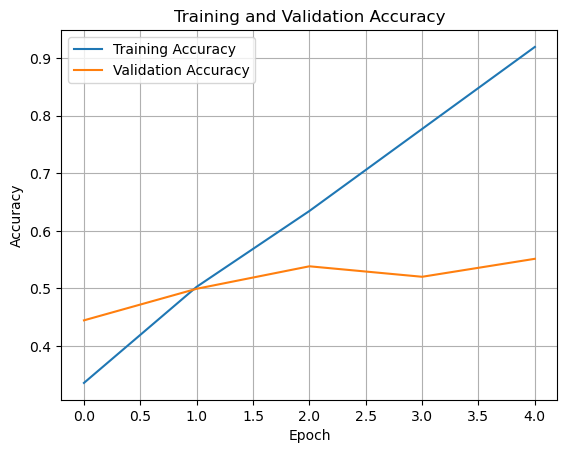

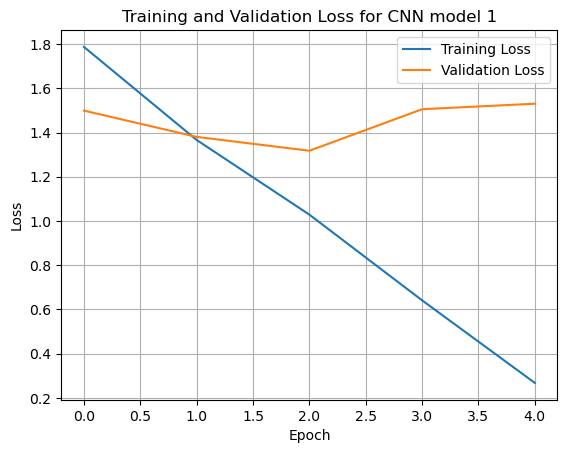

In [9]:
# Get training and validation accuracy
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# Get training and validation loss
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Plot training and validation accuracy
plt.grid("On")
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.grid("On")
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss for CNN model 1")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
# Build a Convolutional Neural network with the following architecture:
# • 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
# • 2x2 Maxpooling layer
# • 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
# • 2x2 Maxpooling layer
# • Flatten layer (to pass to the Fully Connected layers)
# • Fully connected (Dense) layer with 512 units and a sigmoid activation function
# • Dropout layer with 0.2 dropout rate
# • Fully connected layer with 512 units and a sigmoid activation function
# • Dropout layer with 0.2 dropout rate
# • Dense layer (output layer) with 10 units and a suitable activation function for the
# classification task


# CNN Model 2

cnn_2 = Sequential(
    [
        Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(10, activation="softmax"),
    ]
)
cnn_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
cnn_2.summary()
history = cnn_2.fit(
    X_train,
    Y_train_en,
    epochs=num_epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_test, Y_test_en),
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

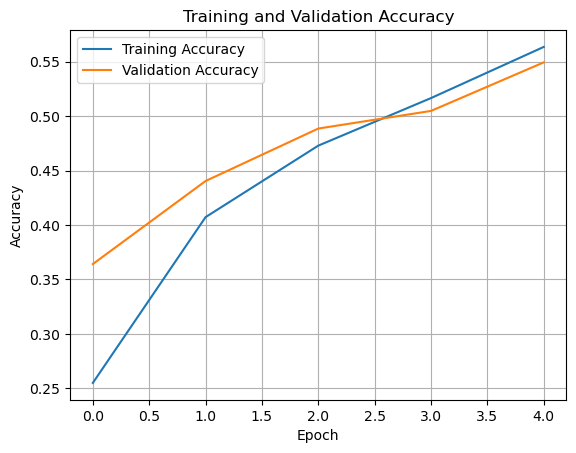

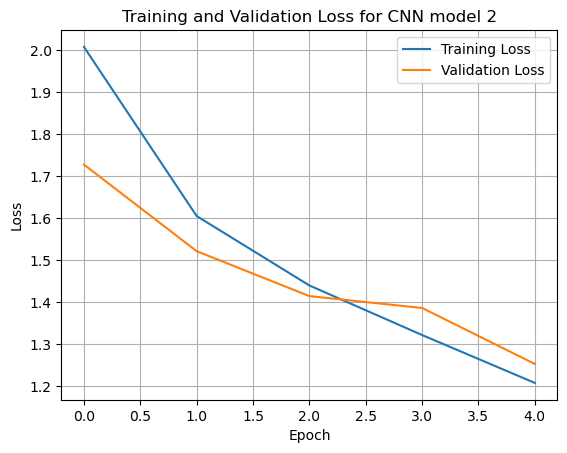

In [12]:
# Get training and validation accuracy
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# Get training and validation loss
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Plot training and validation accuracy\
plt.grid("On")
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.grid("On")
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss for CNN model 2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()